# ADP 대비 통계분석 / 군집분석

## Data = World Happiness(kaggle)
***

In [17]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr, spearmanr, kendalltau

import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('world-happiness-report-2021.csv')

In [19]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [20]:
data.columns = [x.replace(' ', '_') for x in data.columns]

## 1. 통계분석
#### 각 Regional indicaotr 별로 GDP가 상이한가

- 귀무가설 = 차이가 없다.
- 대립가설 = 차이가 있다.

In [21]:
model = ols('Logged_GDP_per_capita ~ C(Regional_indicator)', data = data).fit()

In [22]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Regional_indicator),9.0,132.476870,14.719652,30.910552,4.471161e-29
Residual,139.0,66.192013,0.476202,NaN,NaN


F통계량이 매우 크고 유의확률이 0에 근사하므로 Regional indicator 에 따라 GDP 차이가 존재한다고 할 수 있다.

Tuekey HSD로 사후분석을 시행.

In [23]:
tukey = pairwise_tukeyhsd(data.Logged_GDP_per_capita, data.Regional_indicator.astype('category'), alpha = .05)

In [24]:
print(tukey)

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
        Central and Eastern Europe Commonwealth of Independent States  -0.7072 0.1765 -1.5439  0.1294  False
        Central and Eastern Europe                          East Asia   0.2586    0.9 -0.7951  1.3124  False
        Central and Eastern Europe        Latin America and Caribbean  -0.7391 0.0458 -1.4711  -0.007   True
        Central and Eastern Europe       Middle East and North Africa  -0.4429 0.6641 -1.2041  0.3182  False
        Central and Eastern Europe              North America and ANZ   0.7004 0.6912 -0.5327  1.9336  False
        Central and Eastern Europe                         South Asia  -1.4265  0.001  -2.423 -0.4299   True
        Central and

#### 사회적 지원과 GDP의 상관관계 분석

In [25]:
corr = pearsonr(data.Social_support, data.Logged_GDP_per_capita)

In [26]:
print(f'피어슨 상관수 검정 결과 상관계수는 {round(corr[0], 4)}이고 유의확률은 {round(corr[1], 4)}')

피어슨 상관수 검정 결과 상관계수는 0.7853이고 유의확률은 0.0


***
## 2. 군집분석

In [27]:
from sklearn.decomposition import PCA

In [28]:
data2 = data.iloc[:, [0, 6,7,8,9,10,11]]

In [29]:
data2.set_index('Country_name', inplace = True)
data2.index.name = None

In [30]:
data2

,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Finland,10.775,0.954,72.000,0.949,-0.098,0.186
Denmark,10.933,0.954,72.700,0.946,0.030,0.179
Switzerland,11.117,0.942,74.400,0.919,0.025,0.292
Iceland,10.878,0.983,73.000,0.955,0.160,0.673
Netherlands,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
Lesotho,7.926,0.787,48.700,0.715,-0.131,0.915
Botswana,9.782,0.784,59.269,0.824,-0.246,0.801
Rwanda,7.676,0.552,61.400,0.897,0.061,0.167
Zimbabwe,7.943,0.750,56.201,0.677,-0.047,0.821


In [31]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data2)

In [32]:
pca = PCA(n_components = 5)
comp = pca.fit_transform(scaled)

In [33]:
pca_df = pd.DataFrame(comp, columns = ['주성분1', '주성분2', '주성분3', '주성분4', '주성분5'], index = data2.index)

In [34]:
pca_df

,주성분1,주성분2,주성분3,주성분4,주성분5
Finland,-3.160644,1.021892,1.919606,-0.358701,-0.704374
Denmark,-3.233309,1.632053,1.551046,0.112360,-0.571194
Switzerland,-3.125063,1.172005,1.150585,0.306405,-0.201527
Iceland,-2.538602,0.968646,-1.131645,0.133903,0.021218
Netherlands,-2.733275,1.846785,0.490489,0.659017,-0.268000
...,...,...,...,...,...
Lesotho,2.548185,-0.749396,-0.223108,-0.852848,-1.332962
Botswana,0.323725,-1.145689,0.428547,-1.119579,-0.226640
Rwanda,0.958615,2.899421,2.880193,-0.883908,0.544808
Zimbabwe,2.136760,-0.305586,0.109641,-0.031555,-0.575356


In [35]:
loadings = pd.DataFrame(pca.components_.T, columns = ['주성분1', '주성분2', '주성분3', '주성분4', '주성분5'], index = data2.columns)

In [36]:
loadings

,주성분1,주성분2,주성분3,주성분4,주성분5
Logged_GDP_per_capita,-0.519307,-0.180048,-0.023624,0.259845,0.153894
Social_support,-0.486211,-0.148258,-0.350197,0.091666,-0.739052
Healthy_life_expectancy,-0.514219,-0.128763,0.004209,0.234260,0.585716
Freedom_to_make_life_choices,-0.378871,0.377090,-0.195071,-0.806953,0.141977
Generosity,0.062135,0.750337,-0.471237,0.451757,0.075950
Perceptions_of_corruption,0.286520,-0.473096,-0.785283,-0.118079,0.247245


In [37]:
ax = pd.DataFrame(pca_df.std()).T

In [38]:
pca_summary = pd.concat([ax,pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])

In [39]:
pca_summary

,주성분1,주성분2,주성분3,주성분4,주성분5
0,1.770725,1.138208,0.841244,0.722408,0.501987
0,0.519071,0.214470,0.117157,0.086395,0.041717


In [40]:
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s = s+ proportion[i]
    result.append(np.round(s,4))

In [41]:
pca_summary.loc[1] = result

In [42]:
pca_summary.index = ['표준편차', '변동량', '누적변동량']

In [43]:
pca_summary

,주성분1,주성분2,주성분3,주성분4,주성분5
표준편차,1.770725,1.138208,0.841244,0.722408,0.501987
변동량,0.519071,0.214470,0.117157,0.086395,0.041717
누적변동량,0.519100,0.733500,0.850700,0.937100,0.978800


In [44]:
per_var = np.round(pca.explained_variance_,decimals=1)
labels = ['주성분' + str(x) for x in range(1,len(per_var) + 1)]

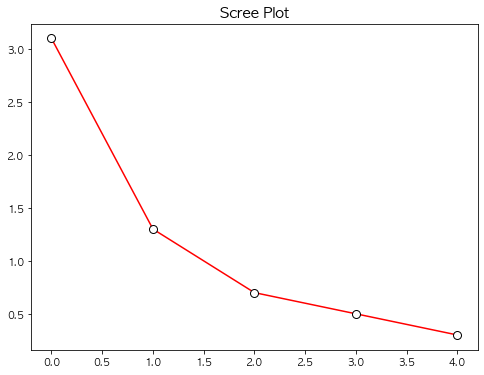

In [45]:
plt.figure(figsize = (8,6))
plt.title('Scree Plot',fontsize = 15)
plt.plot(per_var,marker = 'o',markerfacecolor = 'w',markersize = 8,markeredgecolor='k',color = 'r')
plt.show()

In [46]:
def biplot(score,coeff,value,labels) :
    pca1 = 0
    pca2 = 1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = score.shape[1]

    fig,ax = plt.subplots(figsize = (20, 16))
    ax.scatter(xs,ys)
    for i, txt in enumerate(value) :
        ax.annotate(txt,(xs[i],ys[i]), alpha = .7)
    
    for i in range(n) :
        ax.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color = 'r',alpha = 1)
        ax.text(coeff[i,pca1] * 1.5, coeff[i,pca2] * 1.5, labels[i], color='g', ha='center', va='center')
        

    plt.xlabel('Comp.{}'.format(pca1+1))
    plt.ylabel("Comp.{}".format(pca2+1))
    plt.grid()

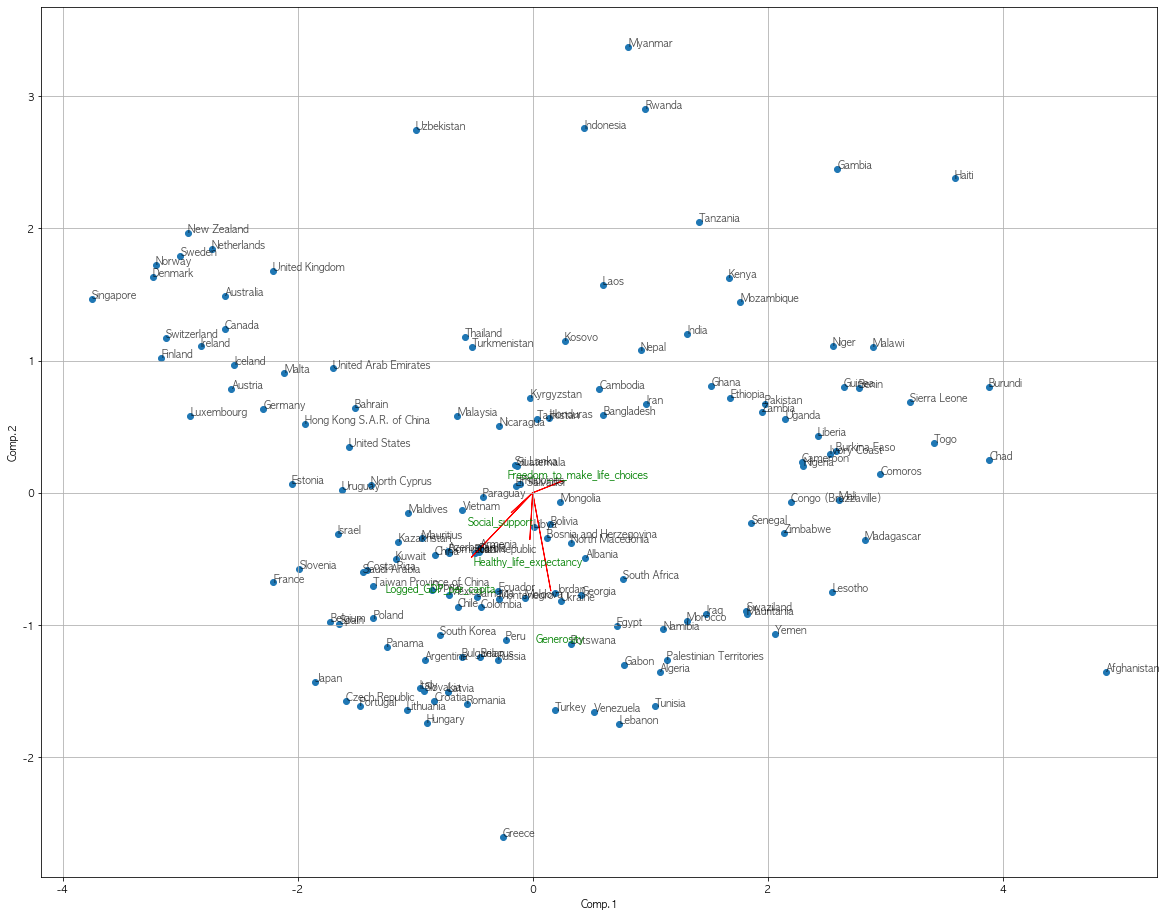

In [47]:
biplot(comp,pca.components_, data2.index, data2.columns)

### 군집별로 결과 시각화

In [48]:
km = KMeans(n_clusters = 6, random_state = 426)

In [49]:
km.fit(scaled)

KMeans(n_clusters=6, random_state=426)

In [50]:
data2.columns = ['1인당국내총생산', '사회적지원', '삶의 선택의 자유', '관용', '평균 수명', '사회의 공정성']

In [51]:
data2['label'] = [f'{x}번군집' for x in km.labels_]

In [52]:
data2.iloc[:, :6] = scaled

In [53]:
gr_med = data2.groupby('label').median().T
gr_med

label,0번군집,1번군집,2번군집,3번군집,4번군집,5번군집
1인당국내총생산,-1.483240,0.529391,1.264210,-0.078555,-0.928554,0.103742
사회적지원,-1.338351,0.587366,1.067703,0.347197,-0.757579,-0.028340
삶의 선택의 자유,-1.488549,0.509058,1.143618,-0.131438,-0.636385,0.110798
관용,-0.837509,0.419675,1.110241,0.787092,0.579037,-0.740121
평균 수명,0.247314,-0.611825,0.603623,1.965592,0.646913,-0.621815
사회의 공정성,0.389368,0.403363,-1.863971,0.840035,-0.002517,0.529326


#########0번군집#########


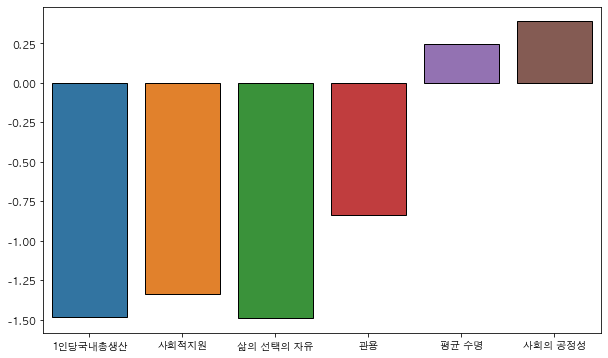

#########1번군집#########


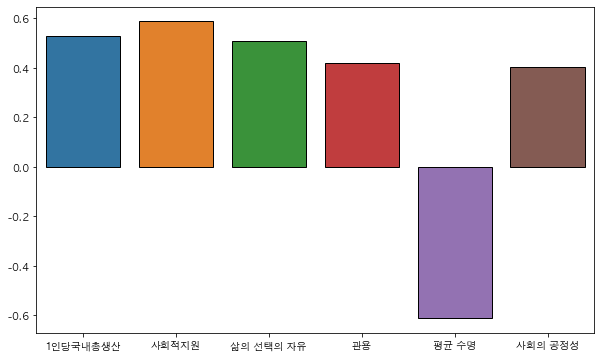

#########2번군집#########


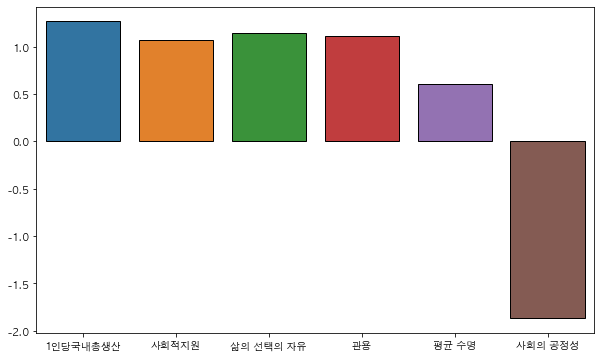

#########3번군집#########


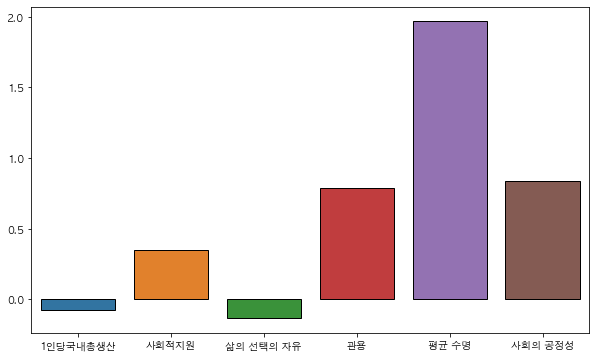

#########4번군집#########


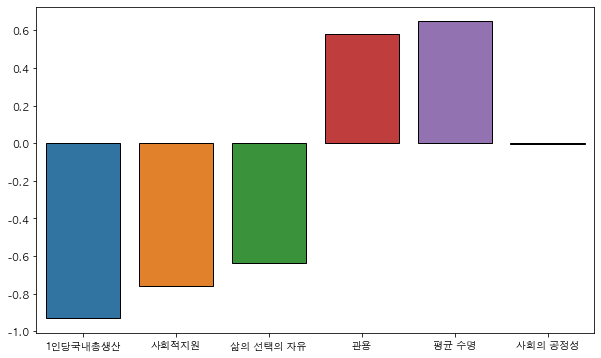

#########5번군집#########


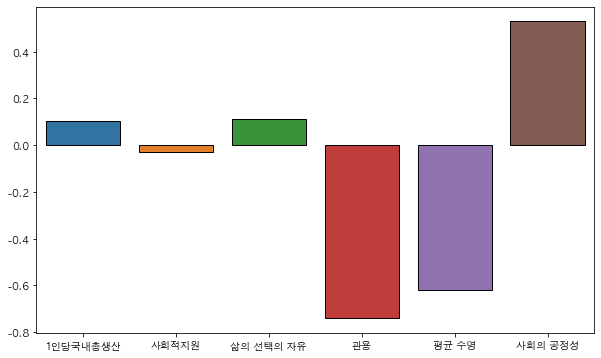

In [54]:
for g in gr_med.columns :
    print(f'#########{g}#########')
    plt.figure(figsize = (10, 6))
    sns.barplot(x = gr_med[g].index, y = gr_med[g].values, edgecolor = (0, 0, 0))
    plt.show()

In [55]:
data2

,1인당국내총생산,사회적지원,삶의 선택의 자유,관용,평균 수명,사회의 공정성,label
Finland,1.162885,1.216171,1.039750,1.393550,-0.551886,-3.031228,2번군집
Denmark,1.299717,1.216171,1.143618,1.366990,0.300594,-3.070416,2번군집
Switzerland,1.459064,1.111370,1.395869,1.127948,0.267294,-2.437802,2번군집
Iceland,1.252086,1.469440,1.188133,1.446671,1.166393,-0.304829,2번군집
Netherlands,1.298851,1.111370,1.099103,1.074828,1.266293,-2.180278,2번군집
...,...,...,...,...,...,...,...
Lesotho,-1.304407,-0.242308,-2.417575,-0.678147,-0.771665,1.049973,0번군집
Botswana,0.302927,-0.268508,-0.849315,0.286874,-1.537565,0.411761,5번군집
Rwanda,-1.520912,-2.294659,-0.533110,0.933173,0.507053,-3.137597,4번군집
Zimbabwe,-1.289685,-0.565444,-1.304554,-1.014577,-0.212226,0.523728,0번군집


In [56]:
data['label'] = km.labels_

In [57]:
data

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,label
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,0
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,5
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,4
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,0


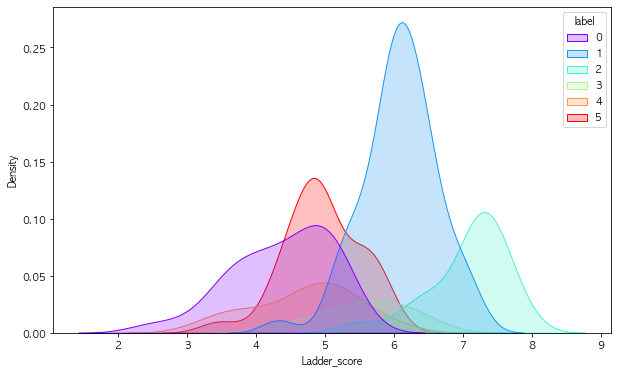

In [66]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data.Ladder_score, hue = data['label'], shade=True, palette = 'rainbow')
plt.show()